In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **Data Cleaning**

### Load in the csv file and Extract relevant columns
**ReleaseDate** - (Str) The date that a game is released

**Metacritic** - (Int) Score of a game

**Genre_Col** - (Bool) True if the game belongs to certain genre, otherwise False

**SteamSpyOwners** - (Int) Number of people who own the game

In [7]:
df = pd.read_csv('../Datasets/games-features.csv')

**Drop games with 0 owners**

We found that some games with 0 owners are actually games that haven't been released yet, but has a page on Steam. So it's impossible to judge how popular that game is. Therefore, we chose to drop games with 0 owners from games dataset. 

**SteamSpyOwnersLog** - (Float) Column that is the log transformation of the number of people who own the game

As we explored the dataset, we found that the number of game owners is not normally distributed. So, we applied a log transformation to the number of game owners to make it relatively normally distributed and more easily used by machine learning models we developed below.

In [8]:
df = df[df['SteamSpyOwners'] > 0]

df['SteamSpyOwnersLog'] = np.log(df['SteamSpyOwners'])

**Drop games that have not been released**

**Drop games whose genre is not game**

In [9]:
df = df.loc[df['ReleaseDate'] != 'Coming Soon']
df = df.loc[df['GenreIsNonGame'] == False]

**Convert ReleaseDate column to pd.datetime type**

**Drop games whose release dates can not be identified**

**Since our dataset was updated in 2016, we decided to only include games released in 2016 or before 2016**

In [10]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors = 'coerce')
df = df.loc[df['ReleaseDate'].notnull()]
df = df.loc[df['ReleaseDate'] < pd.datetime(2017, 1, 1)]

**releaseMetaGenre_df**: DataFrame with ReleaseDate, Metacritic, SteamSpyOwners, SteamSpyOwnersLog, Genre_cols Columns

In [11]:
releaseMetaGenre_df = df[['ReleaseDate', 'Metacritic', 'SteamSpyOwners', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
         'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'SteamSpyOwnersLog']]

## Release Columns Univariate Analysis

**ReleaseMonth** - the month when the game is released

**ReleaseYear** - the year when the game is released

**ReleaseQuarter** - the quarter when game is released
    - 1st quarter: January to March
    - 2nd quarter: April to June
    - 3rd quarter: July to September
    - 4th quarter: October to December

In [12]:
releaseMetaGenre_df['ReleaseMonth'] = releaseMetaGenre_df['ReleaseDate'].dt.month
releaseMetaGenre_df['ReleaseYear'] = releaseMetaGenre_df['ReleaseDate'].dt.year

In [13]:
# function that calculates the quarter when a game is released
def quarter(x):
    if np.isnan(x['ReleaseMonth']):
        return x['ReleaseMonth']
    else:
        val = x['ReleaseMonth'] / 3
        if ((val * 100) %  100 >= 50) | ((val * 100) % 100 == 0):
            return round(val)
        else:
            return round(val) + 1
releaseMetaGenre_df['ReleaseQuarter'] = releaseMetaGenre_df.apply(quarter, axis = 1)

#### Distribution of Release Quarter of Steam Games
We visualized the distribution of steam games' release quarters to see which quarter has more steam games released. From the plot, we found that third quarter(from July to September) has most number of steam games released, while first quarter(from January to March) has least number of steam games released.

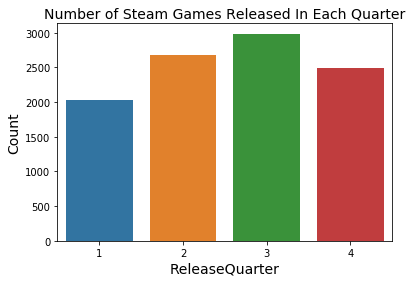

In [14]:
sns.countplot(releaseMetaGenre_df['ReleaseQuarter'])
plt.title('Number of Steam Games Released In Each Quarter', fontsize = 14)
plt.xlabel('ReleaseQuarter', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

#### Distribution of Release Month of Steam Games
We visualized the distribution of steam games' release months to see which months have more steam games released. From the plot, we found that more steam games are released between July and October, and less steam games are released in January, Feburary, and December.

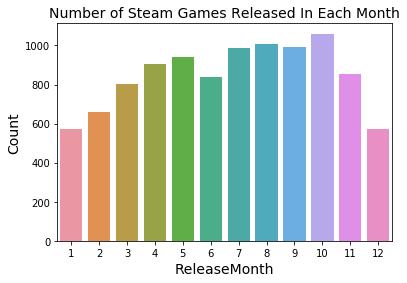

In [15]:
sns.countplot(releaseMetaGenre_df['ReleaseMonth'])
plt.title('Number of Steam Games Released In Each Month', fontsize = 14)
plt.xlabel('ReleaseMonth', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

#### Distribution of Release Year of Steam Games
We visualized the distribution of steam games' release year to see which years have more steam games released. From the plot, we found that many more games have been released since 2012, particularly 2016, and not a lot games were released before 2012. 

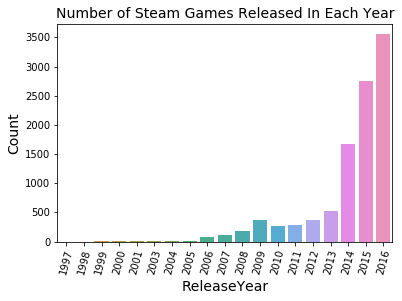

In [16]:
sns.countplot(releaseMetaGenre_df['ReleaseYear'])
plt.xticks(rotation= 75)
plt.title('Number of Steam Games Released In Each Year', fontsize = 14)
plt.xlabel('ReleaseYear', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

## Release Columns In Relation To SteamSpyOwners (Sums)
We created time-series plots to show how total number of steam game owners evolved throughout the years, months, and quarters. 

**Evolution Throughout Years**
- Between 1997 and 2003, total number of steam games owners increased very slowly, because only a few games in the dataset were released during this period and hence total number of owners was small.
- Between 2003 and 2008, total number of steam games owners increased and then decreased repeatedly.
- Since 2008, total number of steam games owners increased steadily, and it jumped up from 2012 to 2013.
- Between 2013 and 2016, total number of steam games owners dropped rapidly.

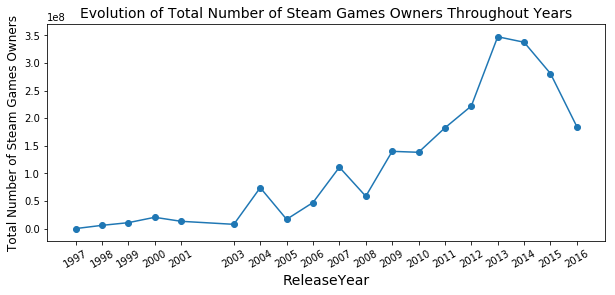

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).index),
                list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).values))
ax.scatter(list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).index),
                list(releaseMetaGenre_df.groupby('ReleaseYear').agg({'SteamSpyOwners': sum}).values))
ax.set_xticks(releaseMetaGenre_df['ReleaseYear'].unique())
plt.xticks(rotation= 30)
plt.title('Evolution of Total Number of Steam Games Owners Throughout Years', fontsize = 14)
plt.xlabel('ReleaseYear', fontsize = 14)
plt.ylabel('Total Number of Steam Games Owners', fontsize = 12)
plt.show()

**Evolution Throughout Months**
- From January to March, total number of games owners increases.
- From March to June, total number of games owners steadily decreases.
- Then, total number of games owners increases and decreases repeatedly.

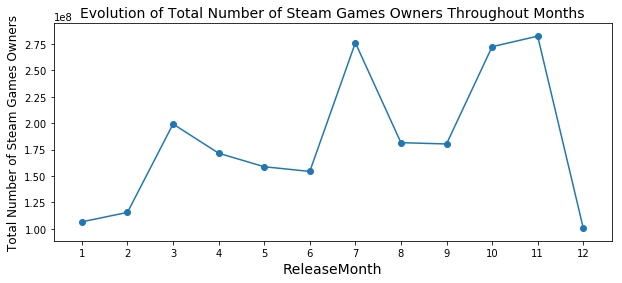

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).index),
                list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).values))
ax.scatter(list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).index),
                list(releaseMetaGenre_df.groupby('ReleaseMonth').agg({'SteamSpyOwners': sum}).values))
ax.set_xticks(np.arange(1, 13))
plt.title('Evolution of Total Number of Steam Games Owners Throughout Months', fontsize = 14)
plt.xlabel('ReleaseMonth', fontsize = 14)
plt.ylabel('Total Number of Steam Games Owners', fontsize = 12)
plt.show()

**Evolution Throughout Quarters**

Total number of steam games owners increases steadily throughout the quarters.

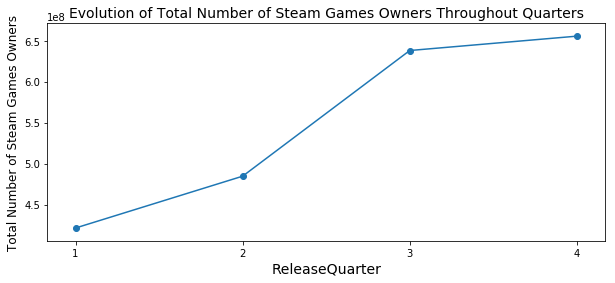

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot((releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).index),
                (releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).values))
ax.scatter((releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).index),
                (releaseMetaGenre_df.groupby('ReleaseQuarter').agg({'SteamSpyOwners': 'sum'}).values))
ax.set_xticks(np.arange(1, 5))
plt.title('Evolution of Total Number of Steam Games Owners Throughout Quarters', fontsize = 14)
plt.xlabel('ReleaseQuarter', fontsize = 14)
plt.ylabel('Total Number of Steam Games Owners', fontsize = 12)
plt.show()

## Metacritic Column Univariate Analysis

**releaseMeta_Genre_drop0_df** - DataFrame obtained after dropping games with no scores

Since a large portion of games do not have scores, we decided to create a releaseMeta_Genre_drop0_df dataframe that only stores the games with scores so that the distribution of metacritic scores is more normally distributed.

In [22]:
releaseMeta_Genre_drop0_df = releaseMetaGenre_df.loc[releaseMetaGenre_df['Metacritic'] != 0]

Here, we plotted the histogram and calculated the interquartile of metacritic scores of games with nonzero scores. From the plot, we found that among games that have metacritic scores, most games have scores between 60 and 88. Moreover, the yellow lines in histogram show that the interquartile of metacritic scores is from approximately 66 to 80.

In [23]:
interquartile = releaseMeta_Genre_drop0_df['Metacritic'].quantile([0.25, 0.75]).tolist()

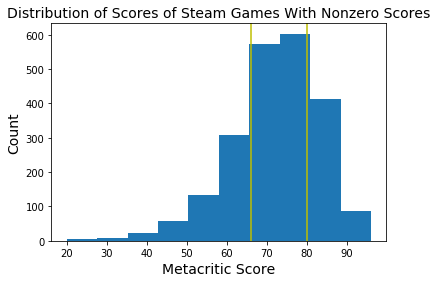

In [24]:
releaseMeta_Genre_drop0_df['Metacritic'].plot(kind = 'hist')
plt.title('Distribution of Scores of Steam Games With Nonzero Scores', fontsize = 14)
plt.xlabel('Metacritic Score', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.axvline(x = interquartile[0], color='y');
plt.axvline(x = interquartile[1], color='y');
plt.show()

## HasMetacritic In Relation To SteamSpyOwnersLog

**HasMetacritic** - (Bool) True if the metacritic score of game is nonzero, otherwise False

In [25]:
releaseMetaGenre_df['HasMetacritic'] = releaseMetaGenre_df['Metacritic'] > 0

We plotted the boxplot to compare the log transformed number of owners of games with and without metacritic scores. The boxplot shows that games with metacritic scores have more log transformed number of owners in general.

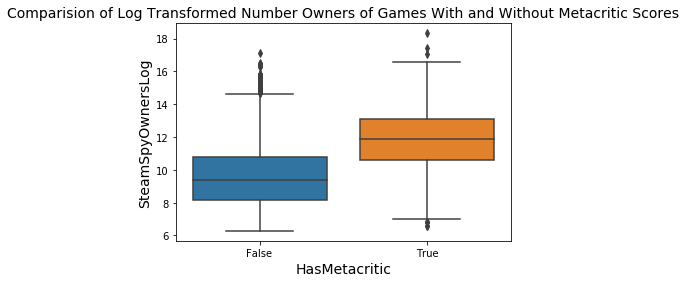

In [26]:
sns.boxplot(x="HasMetacritic", y="SteamSpyOwnersLog", data=releaseMetaGenre_df)
plt.title('Comparision of Log Transformed Number Owners of Games With and Without Metacritic Scores', fontsize = 14)
plt.xlabel('HasMetacritic', fontsize = 14)
plt.ylabel('SteamSpyOwnersLog', fontsize = 14)
plt.show()

## Metacritic In Relation To Averaged SteamSpyOwnersLog
The scatterplot below shows the average of log transformed number of owners of games with different metacritic scores. From the plot, we found that these metacritic and averaged SteamSpyOwnersLog are postiviely associated. As metacritic score increases, average of SteamSpyOwnersLog increases.

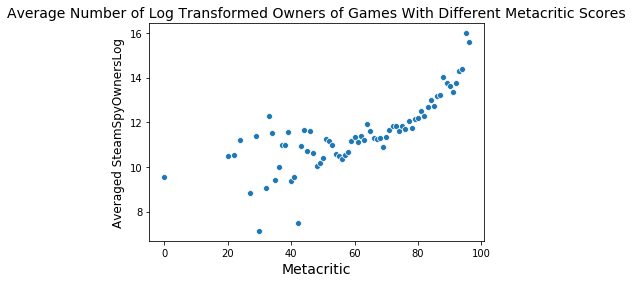

In [27]:
sns.scatterplot(list(releaseMetaGenre_df.groupby('Metacritic').agg({'SteamSpyOwnersLog': 'mean'}).index), 
               list(releaseMetaGenre_df.groupby('Metacritic').agg({'SteamSpyOwnersLog': 'mean'}).values))
plt.title('Average Number of Log Transformed Owners of Games With Different Metacritic Scores', fontsize = 14)
plt.xlabel('Metacritic', fontsize = 14)
plt.ylabel('Averaged SteamSpyOwnersLog', fontsize = 12)
plt.show()

## Genre_Cols Univariate Analysis

In [28]:
genre_cols = ['GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
              'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
              'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
              'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer']

**Counts the number of games of each genre**

In [29]:
lst = []
for col in genre_cols:
    lst.append(pd.DataFrame(releaseMetaGenre_df[col].value_counts()))
genre_game_counts = pd.DataFrame(pd.concat(lst, axis = 1)).T[True]

Here, we plotted the number of games of each genre. The plot shows that most games in the dataset are of genre Indie, Action, and Adventure, while a few games are of genre Sports, Racing, and Massively Multiplayer.

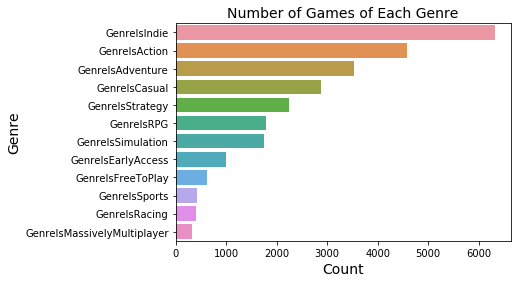

In [30]:
sns.barplot(genre_game_counts.values, genre_game_counts.index, orient = 'h')
plt.xlabel("Count", fontsize = 14) 
plt.ylabel("Genre", fontsize = 14) 
plt.title("Number of Games of Each Genre",fontsize = 14) 
plt.show()

## Genre_Cols In Relation To Total SteamSpyOwners

**Sum up the number of owners of games of each genre**

In [31]:
dic = {}
for col in genre_cols:
    dic[col] = [releaseMetaGenre_df.loc[releaseMetaGenre_df[col]]['SteamSpyOwners'].sum()]
genre_owners_sum = pd.DataFrame(dic, index = ['Sum']).T['Sum']

The plot below shows that Action games has largest total number of owners, which means that many people like to play Action games. Indie, Adventure, Strategy, Free games have approximately similar popularity among players. But, Casual, Simulation, Early Access, Sports, Racing, and especially Massively Multiplayer games have low popularity among players.

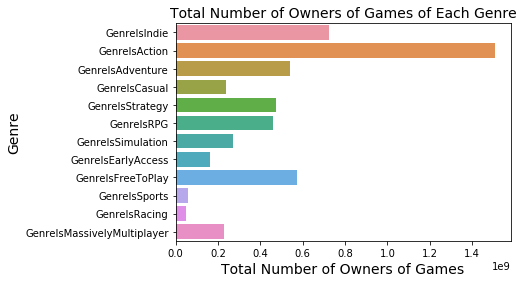

In [32]:
sns.barplot(genre_owners_sum.values, genre_owners_sum.index, orient = 'h')
plt.xlabel("Total Number of Owners of Games", fontsize = 14) 
plt.ylabel("Genre", fontsize = 14) 
plt.title("Total Number of Owners of Games of Each Genre",fontsize = 14) 
plt.show()